# Fundamental classification ML models

### MNIST

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

In [9]:
some_digit.shape

(784,)

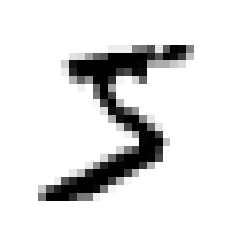

In [10]:
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [11]:
y[0]

'5'

In [12]:
import numpy as np
y = y.astype(np.uint8)

In [13]:
y[0]

5

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a binary classifier

In [15]:
y_train_5 = (y_train == 5)

In [16]:
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

### Performance measures

##### Measuring accuracy using cross-validation

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [22]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [23]:
# Evaluate SGDClassifier model using K-fold cross validation

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3,
               scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [26]:
# Dumb classifier

In [27]:
from sklearn.base import BaseEstimator

In [28]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    

In [29]:
never_5_clf = Never5Classifier()

In [30]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3,
               scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

##### Confusion matrix

In [31]:
from sklearn.model_selection import cross_val_predict

In [32]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [35]:
# Precision
confusion_matrix(y_train_5, y_train_pred)[1][1] / (confusion_matrix(y_train_5, y_train_pred)[1][1] + confusion_matrix(y_train_5, y_train_pred)[0][1])

0.8370879772350012

In [36]:
# Recall (sensitivity)
confusion_matrix(y_train_5, y_train_pred)[1][1] / (confusion_matrix(y_train_5, y_train_pred)[1][1] + confusion_matrix(y_train_5, y_train_pred)[1][0])

0.6511713705958311

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [40]:
# Combined F1 score

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

##### Precision-recall tradeoff

In [43]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [44]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [45]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,
                            method = 'decision_function')

In [47]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls [: -1], 'g--', label = 'Recall')
    return

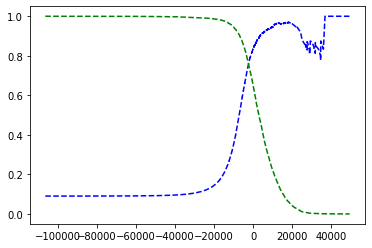

In [49]:
plot_precision_recall_vs_threshold(precision, recalls, thresholds)

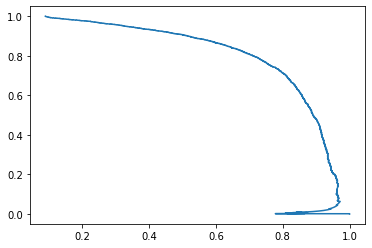

In [50]:
plt.plot(precision, recalls)

In [51]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.9)]

In [52]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [53]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [54]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

##### The ROC curve

In [55]:
from sklearn.metrics import roc_curve

In [56]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [57]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.title('The ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate (recall)')
    return

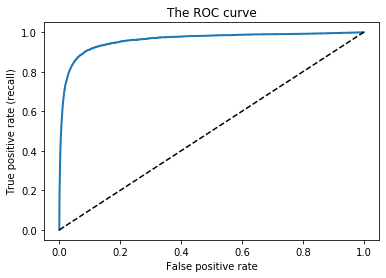

In [58]:
plot_roc_curve(fpr, tpr)
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [61]:
# Compare ROC curves of classifiers

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_clf = RandomForestClassifier(random_state = 42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                  method = 'predict_proba')

In [64]:
y_scores_forest = y_proba_forest[:, 1]

In [65]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

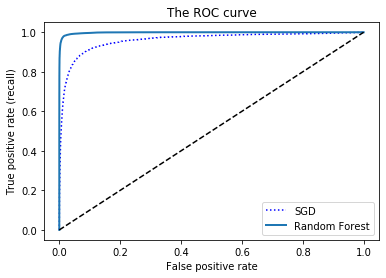

In [66]:
plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc = 'lower right')
plt.show()

In [67]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

### Multiclass classification

In [68]:
from sklearn.svm import SVC

In [69]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [71]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [72]:
np.argmax(some_digit_scores)

5

In [73]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [74]:
svm_clf.classes_[5]

5

In [75]:
# Force to use OvO or OvR

In [76]:
from sklearn.multiclass import OneVsRestClassifier

In [77]:
ovr_clf = OneVsRestClassifier(SVC())

In [78]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [79]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [80]:
len(ovr_clf.estimators_)

10

In [81]:
# Train an SGDClassifier or a RandomForestClassifier

In [82]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [84]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [85]:
# Use cross validation to evaluate the SGDClassifier accuracy:

In [86]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [87]:
# Scaling for better accuracy

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [91]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

### Error analysis